In [14]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [15]:
# Load dataset
df = pd.read_csv('synthetic_forest_fire_data_100.csv')

In [16]:
# Display sample data
print("Sample data:")
print(df.head())

Sample data:
   temperature   humidity  wind_speed   rainfall  vegetation_index  \
0    26.236204  12.514335   25.681266   1.033634          0.182499   
1    43.521429  60.912833    3.365599  10.627093          0.822042   
2    36.959818  35.148478    6.465149  10.812702          0.504202   
3    32.959755  50.685655   35.942168  12.748598          0.761166   
4    19.680559  82.605318   24.257162  14.521827          0.356040   

   smoke_level  fire_occurred  
0   209.448514              0  
1   160.828910              0  
2    92.858285              0  
3   244.138506              0  
4   205.419352              0  


In [17]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 temperature         0
humidity            0
wind_speed          0
rainfall            0
vegetation_index    0
smoke_level         0
fire_occurred       0
dtype: int64


In [18]:
# Correlation matrix 
correlation_matrix = df.corr()

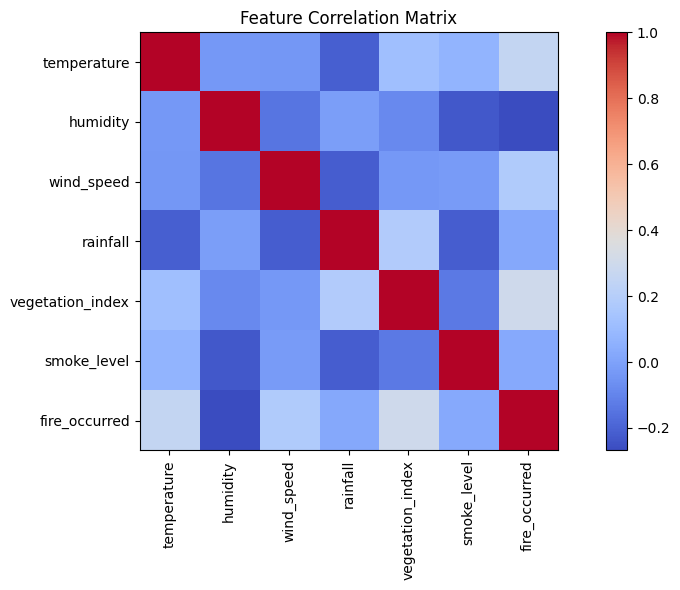

In [19]:
# Plot correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [20]:
# Feature matrix and target
X = df.drop('fire_occurred', axis=1)
y = df['fire_occurred']

In [21]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


 0.9racy:


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20


Confusion Matrix:
 [[18  0]
 [ 2  0]]


In [25]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

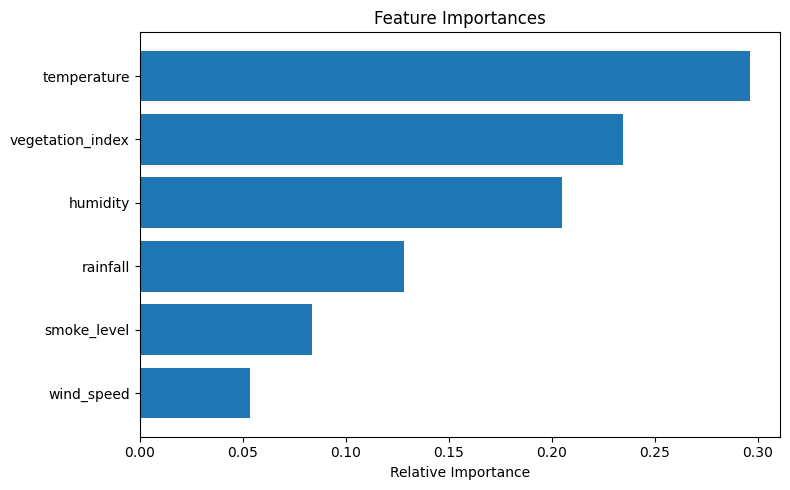

In [26]:
# Plot feature importance
plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()